In [1]:
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
def plot_array(arr, title=""):
    if arr.ndim == 4: 
        # remove the first two dimensions (batch and channel) using slicing and reshape
        arr = arr.detach().squeeze(0).squeeze(0).float()
    fig, ax = plt.subplots()
    ax.imshow(arr)
    
    # Add the numerical values as text annotations
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            ax.text(j, i, arr[i, j], ha="center", va="center", color="w")

    # Add a colorbar to the plot
    #cbar = ax.figure.colorbar(im, ax=ax)
    fig.suptitle(title)
    # Show the plot
    ax.axis("off")
    plt.show()

In [3]:
# Custom normalisation function
def gaped_normalisation(data, reconstruction_threshold, time_dimension=100):
    data = np.where(data > 0, (((data / time_dimension) / (1/(1-reconstruction_threshold))) + reconstruction_threshold), 0 )
    return data

In [8]:
in_array = np.array(([0,0,0,1],
                    [0,0,200,0],
                    [0,600,0,0], 
                    [1000,0,0,0]))


norm_array = gaped_normalisation(in_array, 0.5, 1000)

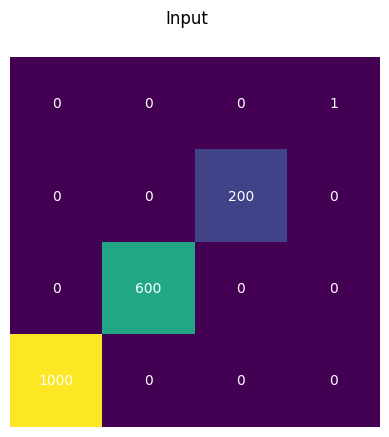

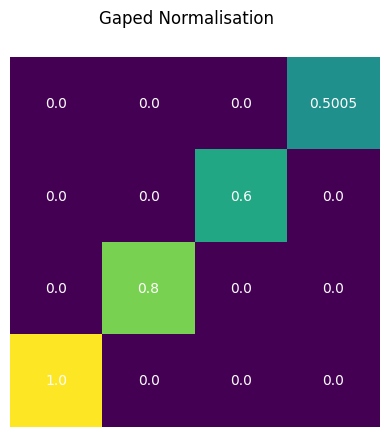

In [9]:
plot_array(in_array, "Input")
plot_array(norm_array, "Gaped Normalisation")

